<a href="https://colab.research.google.com/github/malickl/Pratique_Knn/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# importer les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

In [51]:
# charger le data set digits
digits = load_digits()
X,y = digits.data, digits.target

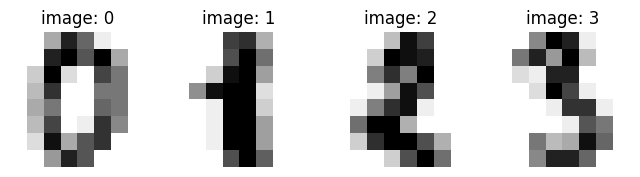

In [52]:
# visualiser images & target
_,axes = plt.subplots(nrows=1, ncols=4, figsize =(8,8))
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("image: %i" % label)

In [53]:
# Diiviser le dataset en jeu d’apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [54]:
# Créer le modele knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
#Le taux de précision
score = knn.score(X_test, y_test)
print('score : %f' % score)

score : 0.986667


In [56]:
# Tester des k de 1 a 20 pour voir les meilleurs résultats
neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate (neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_accuracy[i] = knn.score(X_train,y_train)
  test_accuracy[i] = knn.score(X_test,y_test)

In [57]:
print(test_accuracy)

[0.98888889 0.98222222 0.98666667 0.98666667 0.98666667 0.98222222
 0.98       0.97777778 0.97777778 0.97777778 0.98       0.97555556
 0.98       0.97777778 0.98       0.97777778 0.97777778 0.98222222
 0.97777778 0.97777778]


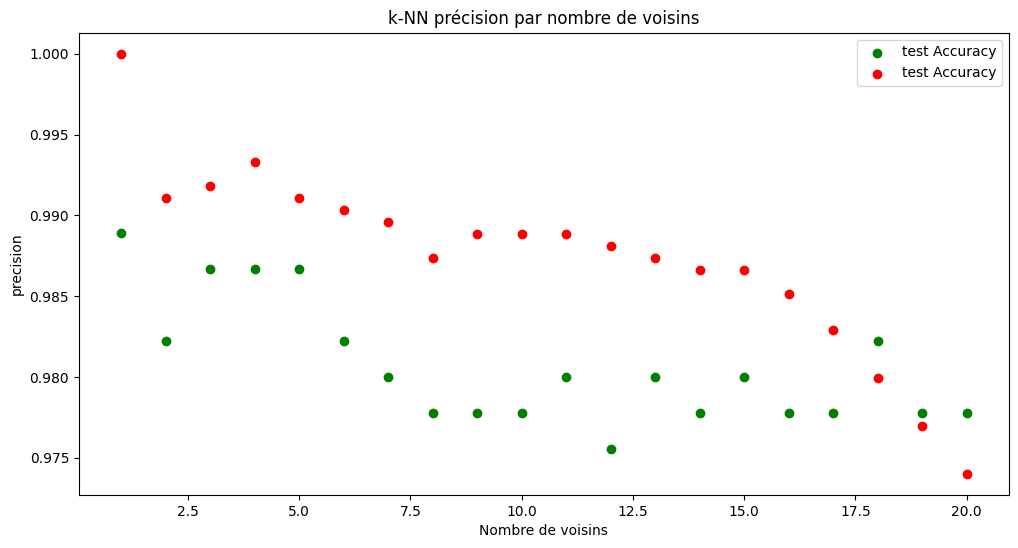

In [58]:
#Visualiser le taux d’apprentissage et test
plt.figure(figsize=(12,6))
plt.title('k-NN précision par nombre de voisins')
plt.scatter(neighbors, test_accuracy, label='test Accuracy', color="green")
plt.scatter(neighbors, train_accuracy, label='test Accuracy', color="red")
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('precision')
plt.show()

In [59]:
y_pred = knn.predict(X_test)

In [60]:
#Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0, 46,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0, 50]])

In [61]:
np.bincount(y_test)

array([45, 47, 45, 47, 52, 43, 38, 42, 39, 52])